# Тестовое задание Вдовиченко В.В. 14.06.2022

https://drive.google.com/file/d/1NXeb5jWDn-pWkOMtOYLQimYK7wH88eJ8/view


Импортируем необходимые библиотеки:

In [16]:
import pandas as pd
import json
import numpy as np
pd.options.plotting.backend = 'plotly'

Читаем датафрейм, видим что есть еще один вложенный в столбец "event_json" датафрейм

In [169]:
df = pd.read_csv('us events ad_revenue filtered 03.02-07.02.csv')

In [170]:
df.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN


In [171]:
df_new = pd.json_normalize(df.event_json.apply(json.loads))

Читаем датафрейм из столбца и объединяем два датафрейма

In [241]:
df_new.head()

,ad_type,placement,view_index,session_view_index,cur_ticks,session_length,revenue,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,currency,ad_country_code,network_name,ad_unit_id,ad_network_placement,creativeId
0,banner,,1,0,637795729492245130,705.88070,0.000510,0.487877,0.511508,0.511508,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CJ3XirfD5vUCFYPnKAUdG3MOYQ
1,banner,,1,0,637795729659949790,722.65120,0.000510,0.488387,0.511389,0.511389,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CNa-lL_D5vUCFZrpKAUdU2QBDQ
2,banner,,1,0,637796515863735930,431.81290,0.002386,0.678479,0.928597,0.928597,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-58
3,int,next_level,1,1,637797353426827330,125.94960,0.013894,0.013894,13.782633,13.893784,0.013894,USD,US,AppLovin,3ab7705b07ebb75f,inter_regular,13045364
4,banner,,1,0,637797357392197840,12.71129,0.006828,0.060571,1.660282,1.660282,0.006828,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMTi5e-h6_UCFUdVwQodt9EIMw


In [173]:
new_df = pd.concat([df, df_new], axis=1)

Объединяем датафреймы, смотрим шапку

In [244]:
new_df.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,...,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,currency,ad_country_code,network_name,ad_unit_id,ad_network_placement,creativeId
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,...,0.487877,0.511508,0.511508,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CJ3XirfD5vUCFYPnKAUdG3MOYQ
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,...,0.488387,0.511389,0.511389,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CNa-lL_D5vUCFZrpKAUdU2QBDQ
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,...,0.678479,0.928597,0.928597,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-58
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,...,0.013894,13.782633,13.893784,0.013894,USD,US,AppLovin,3ab7705b07ebb75f,inter_regular,13045364
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,...,0.060571,1.660282,1.660282,0.006828,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMTi5e-h6_UCFUdVwQodt9EIMw


Построим распределение revenue по профилям людей.

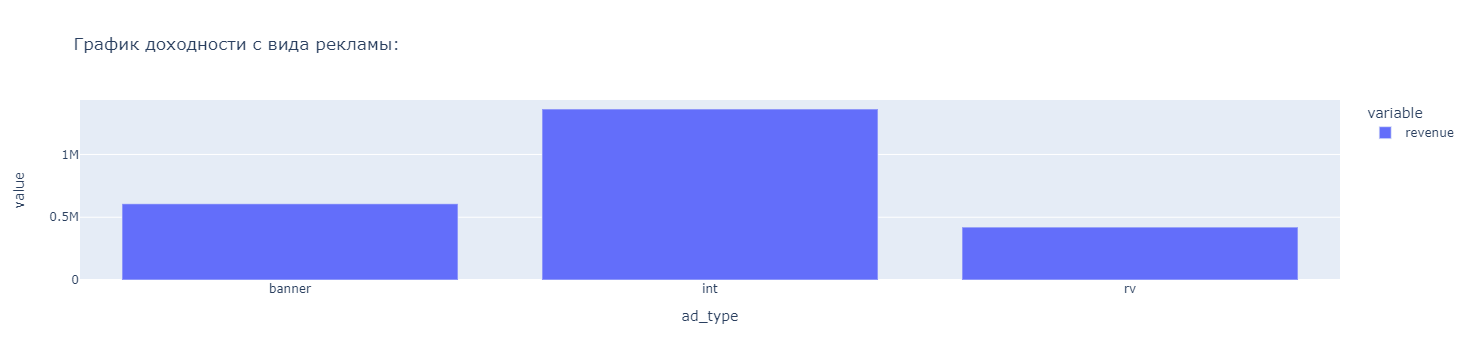

In [315]:
(new_df.groupby('ad_type')['revenue'].sum()*1000).plot(kind='bar', title='График доходности с вида рекламы:').show(renderer='png')

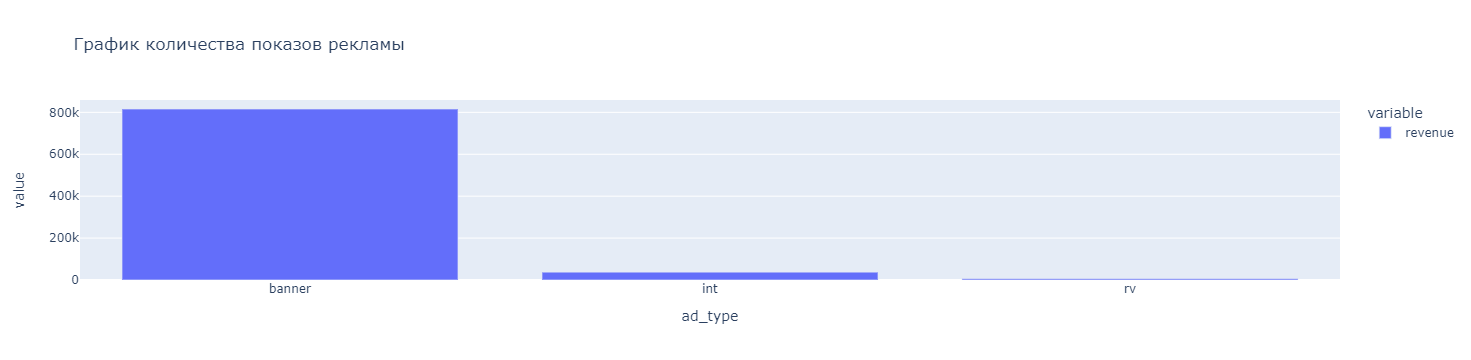

In [316]:
new_df.groupby('ad_type')['revenue'].count().plot(kind='bar', title='График количества показов рекламы').show(renderer='png')

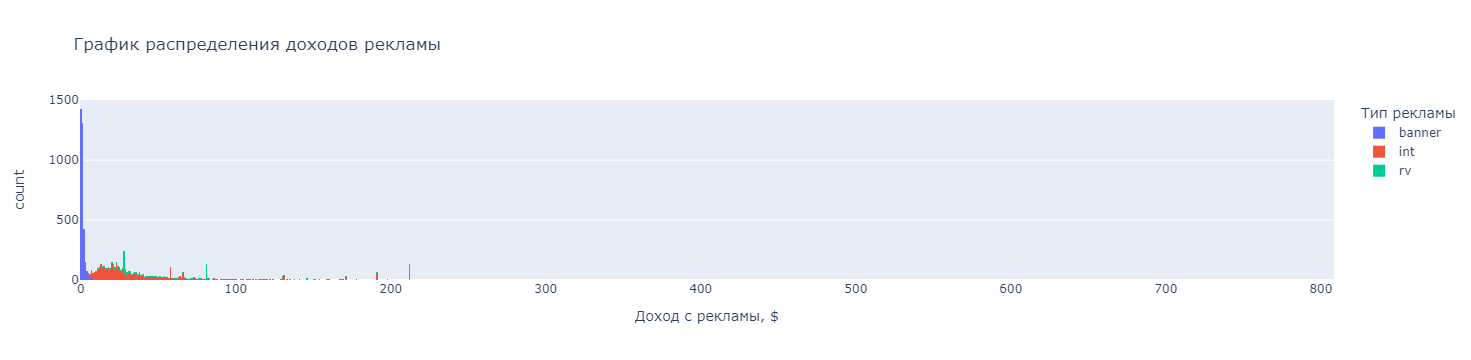

In [317]:
px.histogram((new_df.groupby(['profile_id', 'ad_type'])['revenue'].mean()*1000).unstack(), nbins=1000, labels={'value': 'Доход с рекламы, $', 'count': 'Количество показов', 'ad_type': 'Тип рекламы'},
            title='График распределения доходов рекламы').show(renderer='png')

Можно увидеть что реклама типа int приносит наибольшие доходы, banner - второй по доходности, их же больше всего, rv приносит наименьшую доходность, и их меньше всего, но при разнице в количестве показов, сравнительно с banner почти в 130 раз, rv приносит почти столько же доходов

Возможно есть смысл увеличить количество показов rv и уменьшить количество показов banner, потому что при наименьшем количестве показов они приносят почти столько же доходности, сколько banner с наибольшим количеством показов

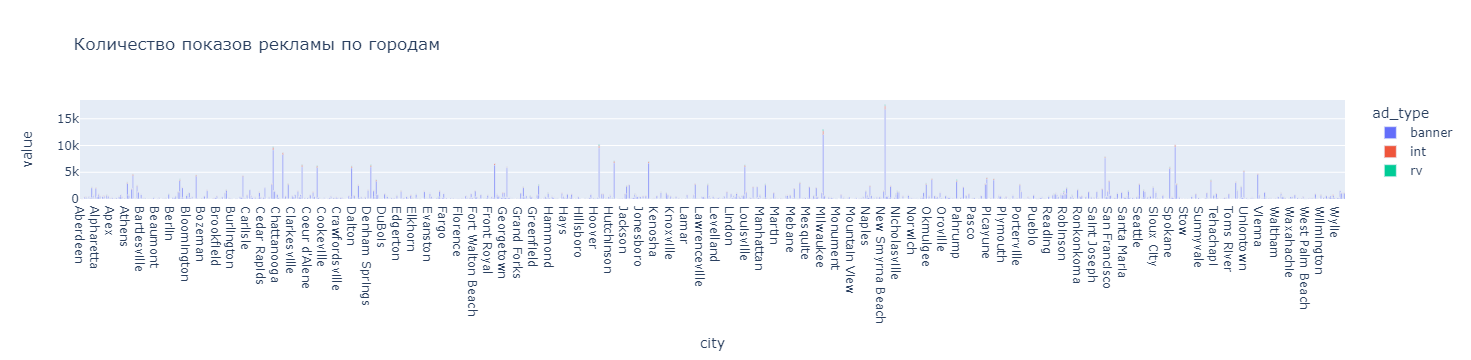

In [321]:
new_df.groupby(['city', 'ad_type'])['revenue'].count().unstack().plot(kind='bar', title='Количество показов рекламы по городам').show(renderer='png')

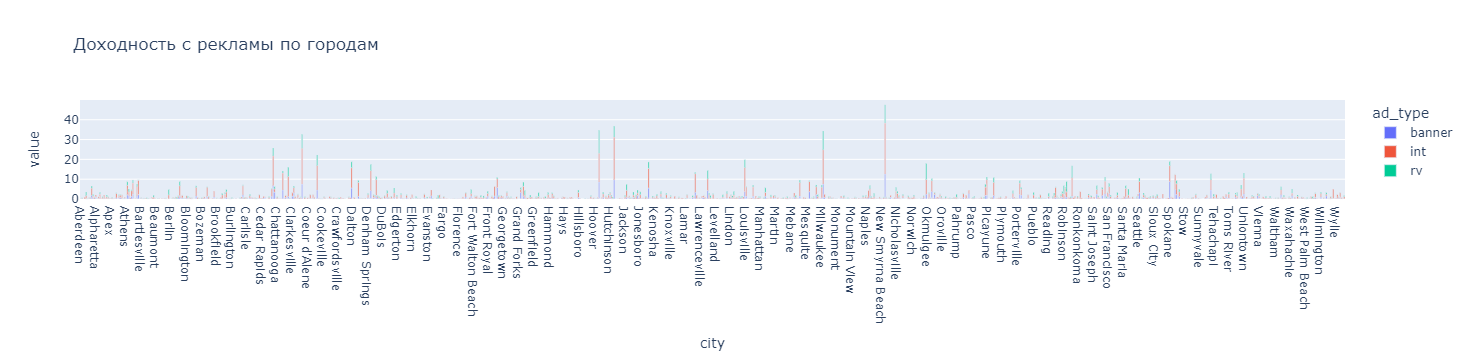

In [323]:
new_df.groupby(['city', 'ad_type'])['revenue'].sum().unstack().plot(kind='bar', title='Доходность с рекламы по городам').show(renderer='png')

Видим что есть города, в которых реклама окупается лучше чем в других, возможно стоит увеличить количество показов там.

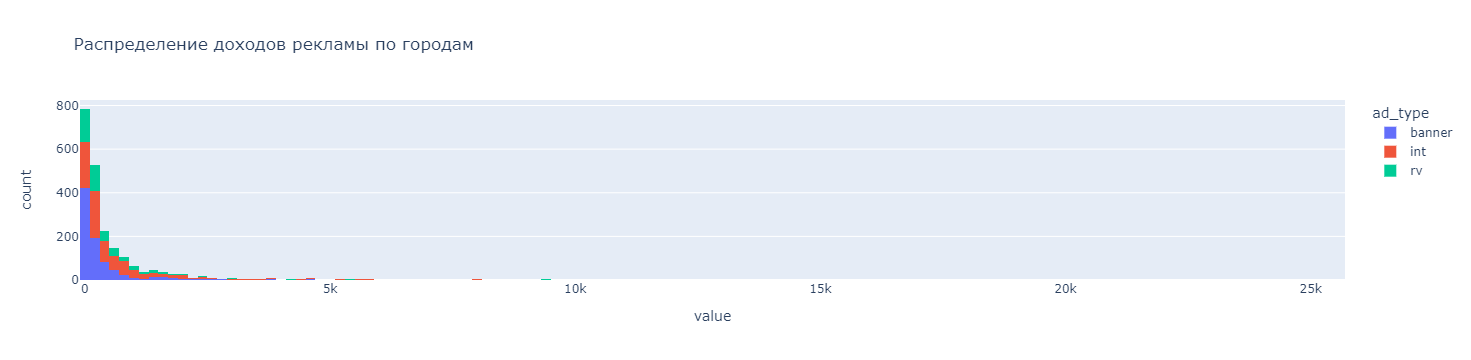

In [347]:
plot = new_df.groupby(['city', 'ad_type'])['revenue'].sum()*1000
plot.unstack().plot(kind='histogram', bins=20, title='Распределение доходов рекламы по городам').show(renderer='png')

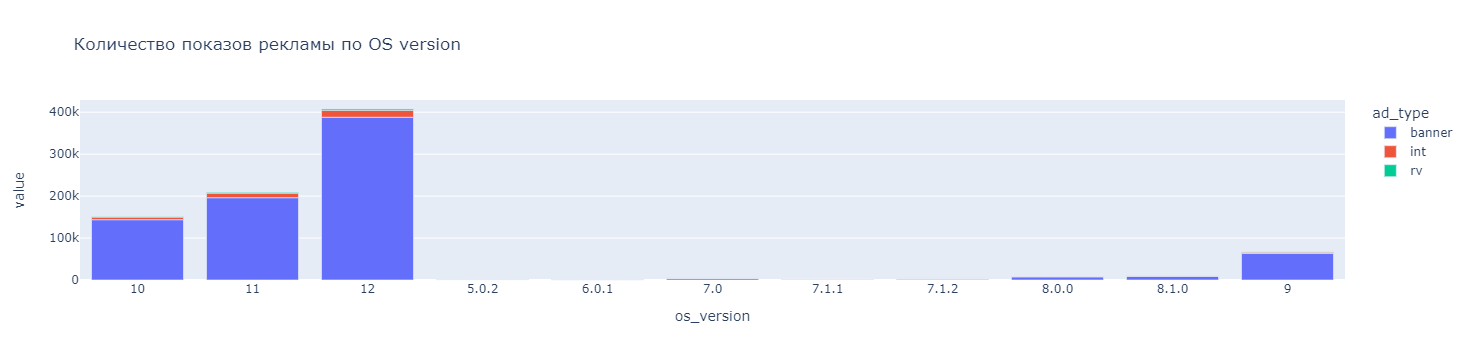

In [335]:
new_df.groupby(['os_version', 'ad_type'])['revenue'].count().unstack().plot(kind='bar', title='Количество показов рекламы по OS version').show(renderer='png')

In [351]:
new_df.groupby(['os_version', 'ad_type'])['revenue'].sum().unstack().plot(kind='bar', title='Доходность с рекламы по OS version').show(renderer='png')

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


Здесь не видим ничего примечательного, распределение по тому же принципу, что и в распределении средних ECPM-ов

In [352]:
! pip install -U kaleido

     ---------------------------------------- 65.9/65.9 MB 5.3 MB/s eta 0:00:00
